# EDA first version created by Surnjani Djoko (March 30, 2022)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import os

project_path = '/content/drive/My Drive/fourthbrain/Capstone project/'
#project_dir = os.path.join(project_path, 'data_set1.csv') # ----- after dropping missing values ...
project_dir = os.path.join(project_path, 'all-the-news-2-1.csv')
project_dir

'/content/drive/My Drive/fourthbrain/Capstone project/data_set1.csv'

In [4]:
df = pd.read_csv(project_dir)
df.shape, display(df.sample(3))

,date,year,month,day,title,article,publication
977615,2018-11-01,2018,11.000,1,Fact-checking Trump's immigration speech,(CNN)As the hours tick down to the critical m...,CNN
1109286,2018-01-02,2018,1.000,2,Guy Accidentally Sets a New Tetris Record,Image: Jonas NeubauerThe NES version of Tetris...,Gizmodo
1407486,2016-12-22,2016,12.000,22,"Amazon Reviewers Are Trolling Ivanka Trump, Bu...",A lot of Americans are none too happy about Do...,CNBC


((2584149, 7), None)

## high level review on the missing data

In [ ]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,date,year,month,day,author,title,article,url,section,publication
0,0,0,2016-12-09 18:31:00,2016,12.000,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,1,1,2016-10-07 21:26:46,2016,10.000,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2,2,2018-01-26 00:00:00,2018,1.000,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,3,3,2019-06-27 00:00:00,2019,6.000,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,4,4,2016-01-27 00:00:00,2016,1.000,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [ ]:
df.tail(5)

,Unnamed: 0,Unnamed: 0.1,date,year,month,day,author,title,article,url,section,publication
2688874,2789269,2790029,2020-04-01 00:00:00,2020,4.000,1,NaN,Florida Ammo Selling Out On Heels of Stay-At-H...,Florida residents are gunning for all the ammo...,https://www.tmz.com/2020/04/01/florida-ammo-se...,NaN,TMZ
2688875,2789270,2790030,2020-04-01 00:00:00,2020,4.000,1,NaN,Disney Forcing Annual Pass Holders to Continue...,Disney isn't letting its most loyal customers ...,https://www.tmz.com/2020/04/01/disney-forcing-...,NaN,TMZ
2688876,2789271,2790031,2020-04-01 00:00:00,2020,4.000,1,NaN,Nick Cannon Pimps Out His Impala with Custom N...,Nick Cannon still has Nipsey Hussle in his tho...,https://www.tmz.com/2020/04/01/nick-cannon-imp...,NaN,TMZ
2688877,2789272,2790032,2020-04-01 00:00:00,2020,4.000,1,NaN,Pete Buttigieg Says Governors Showing More Lea...,Pete Buttigieg says it's inspiring to see the ...,https://www.tmz.com/2020/04/01/pete-buttigieg-...,NaN,TMZ
2688878,2789273,2790033,2020-04-01 00:00:00,2020,4.000,1,NaN,Ruth Bader Ginsburg Still Working Out with Tra...,Here's some good news we can all use ... Ruth ...,https://www.tmz.com/2020/04/01/ruth-bader-gins...,NaN,TMZ


In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [ ]:
100*(df.isna().sum()/df.shape[0])

date           0.000
year           0.000
month          0.000
day            0.000
author        37.975
title          0.001
article        3.894
url            0.468
section       33.928
publication    0.468
dtype: float64

In [ ]:
df.section.nunique()

7509

In [ ]:
df[df.article.isnull()].head(10)

,date,year,month,day,author,title,article,url,section,publication
471,2016-03-03 00:00:00,2016,3.000,3,NaN,"#GIFparty: Bieber, Kanye, Rihanna ... Who Will...",NaN,https://www.tmz.com/2016/03/03/twitter-gif-party/,NaN,TMZ
557,2019-06-06 00:00:00,2019,6.000,6,Richard Leong,TREASURIES-U.S. yield curve flattens as ECB ho...,NaN,https://www.reuters.com/article/usa-bonds/trea...,Bonds News,Reuters
1811,2019-06-27 00:00:00,2019,6.000,27,NaN,"EMERGING MARKETS-Brazil's real, stocks weaken ...",NaN,https://www.reuters.com/article/emerging-marke...,Bonds News,Reuters
1937,2019-06-14 00:00:00,2019,6.000,14,NaN,S.Korea stocks inch down on stalled trade talk...,NaN,https://www.reuters.com/article/southkorea-mar...,Asia,Reuters
2618,2016-09-03 14:00:00,2016,9.000,3,Michel Esselbrügge,"'Little Prisoners,' Today's Comic by Michel Es...",NaN,https://www.vice.com/en_us/article/zn8m98/litt...,Comics!,Vice
3150,2019-06-27 00:00:00,2019,6.000,27,NaN,S.Korea stocks rise after White House confirms...,NaN,https://www.reuters.com/article/southkorea-mar...,Asia,Reuters
3516,2019-07-01 00:00:00,2019,7.000,1,NaN,"EMERGING MARKETS-Latam currencies, stocks surg...",NaN,https://www.reuters.com/article/emerging-marke...,Bonds News,Reuters
4281,2019-06-24 00:00:00,2019,6.000,24,Richard Leong,"FOREX-Dollar dips on U.S. rate-cut bets, bitco...",NaN,https://www.reuters.com/article/global-forex/f...,Market News,Reuters
4587,2019-07-03 00:00:00,2019,7.000,3,NaN,"Morning News Call - India, July 3",NaN,https://www.reuters.com/article/india-morningc...,Market News,Reuters
4630,2016-02-01 00:00:00,2016,2.000,1,NaN,"Blac Chyna, Rob Kardashian Back in L.A. After ...",NaN,https://www.tmz.com/2016/02/01/blac-chyna-rob-...,NaN,TMZ


In [ ]:
# drop columns author, section and URL
df.drop(columns=['author','url','section'], inplace=True)
df.shape, 100*(df.isna().sum()/df.shape[0])

((2688879, 7), date          0.000
 year          0.000
 month         0.000
 day           0.000
 title         0.001
 article       3.894
 publication   0.468
 dtype: float64)

In [ ]:
df = df[~df.article.isnull()]
df.shape, 100*(df.isna().sum()/df.shape[0])

((2584165, 7), date          0.000
 year          0.000
 month         0.000
 day           0.000
 title         0.001
 article       0.000
 publication   0.000
 dtype: float64)

In [ ]:
df = df[~df.title.isnull()]
df.shape, 100*(df.isna().sum()/df.shape[0])

((2584149, 7), date          0.000
 year          0.000
 month         0.000
 day           0.000
 title         0.000
 article       0.000
 publication   0.000
 dtype: float64)

In [ ]:
df.year.unique()
# need to fix the year formatting!

array([2016, 2018, 2019, 2017, '2019', '2016', '2017', '2018', 2020],
      dtype=object)

In [ ]:
df.year.astype(str).unique()

array(['2016', '2018', '2019', '2017', '2020'], dtype=object)

In [ ]:
df.year = df.year.astype(str)

In [ ]:
df.month.unique()

array([12., 10.,  1.,  6.,  5.,  3., 11.,  9.,  7.,  2.,  4.,  8.])

In [ ]:
# save a version after columns dropping
project_path = '/content/drive/My Drive/fourthbrain/Capstone project/'
df.to_csv(project_path+'data_set1.csv', index=False)

## Calculating summary statistics for columns

In [ ]:
df.columns

Index(['date', 'year', 'month', 'day', 'title', 'article', 'publication'], dtype='object')

In [ ]:
df['title'].str.len().describe().T

count   2584149.000
mean         63.567
std          17.473
min           1.000
25%          53.000
50%          63.000
75%          72.000
max        5038.000
Name: title, dtype: float64

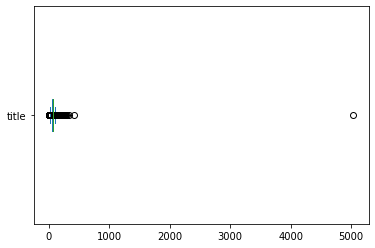

In [ ]:
df['title'].str.len().plot(kind='box', vert=False)

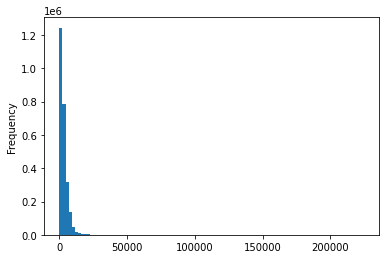

In [ ]:
df['article'].str.len().plot(kind='hist', bins=100)

In [ ]:
df['article'].str.len().describe().T

count   2584149.000
mean       3121.014
std        3375.868
min           1.000
25%        1154.000
50%        2336.000
75%        4058.000
max      224788.000
Name: article, dtype: float64

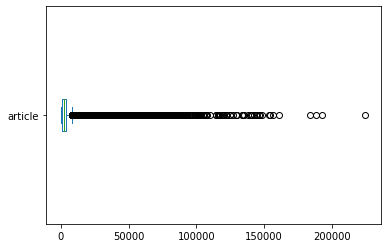

In [ ]:
df['article'].str.len().plot(kind='box', vert=False)

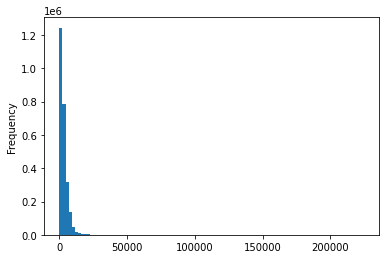

In [ ]:
df['article'].str.len().plot(kind='hist', bins=100)

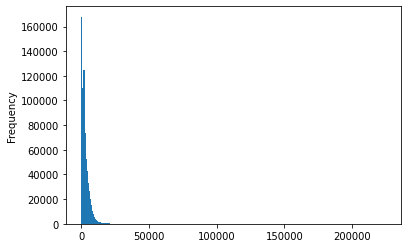

In [ ]:
df['article'].str.len().plot(kind='hist', bins=1000)

In [ ]:
df[['year','month']].describe(include='O').T

,count,unique,top,freq
year,2584149,5,2017,635785


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584149 entries, 0 to 2688878
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   year         object 
 2   month        float64
 3   day          object 
 4   title        object 
 5   article      object 
 6   publication  object 
dtypes: float64(1), object(6)
memory usage: 157.7+ MB


In [ ]:
df['month'].astype('category').describe(include='O').T

count    2584149.000
unique        12.000
top            3.000
freq      284115.000
Name: month, dtype: float64

In [ ]:
df.publication.value_counts()

Reuters               825136
The New York Times    249072
CNBC                  234139
The Hill              208411
People                135691
CNN                   125300
Vice                  100986
Mashable               94107
Refinery 29            87111
Business Insider       57934
TechCrunch             52051
The Verge              51556
TMZ                    49504
Axios                  47311
Vox                    47265
Politico               46235
Buzzfeed News          32724
Gizmodo                27226
Economist              23200
Wired                  20185
Fox News               20144
Vice News              15539
Hyperallergic          13539
New Republic           11807
New Yorker              4644
Washington Post         3332
Name: publication, dtype: int64

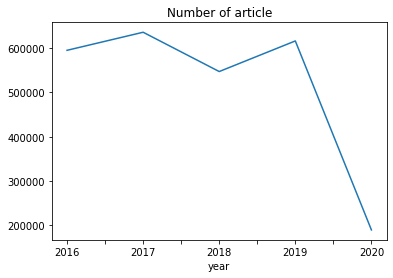

In [ ]:
df.groupby('year').size().plot(title='Number of article')

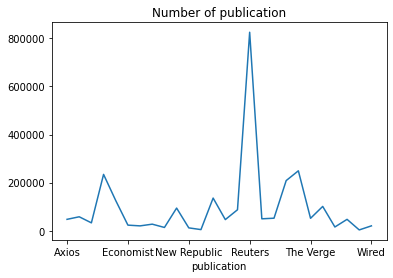

In [ ]:
df.groupby('publication').size().plot(title='Number of publication')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


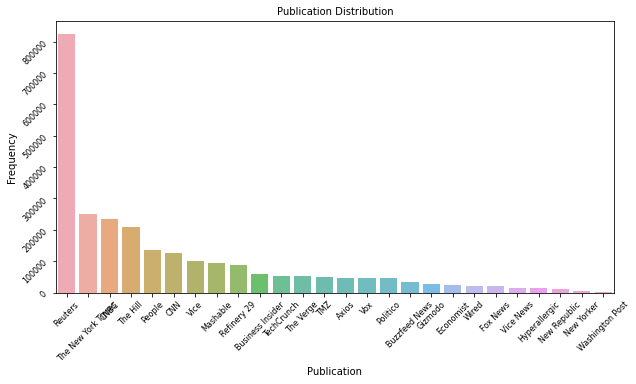

In [ ]:
x = df.publication.value_counts()
y = x.sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Publication Distribution", fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel('Publication', fontsize=10)
plt.xticks(fontsize=8)
plt.tick_params(labelrotation=45)

<Figure size 1080x576 with 0 Axes>

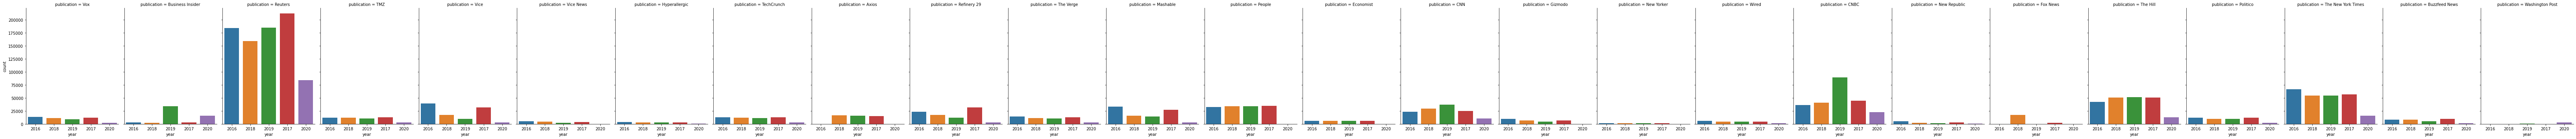

In [ ]:
plt.figure(figsize=(15,8))
sns.catplot(x="year", col="publication", kind="count", data=df, aspect=0.7)

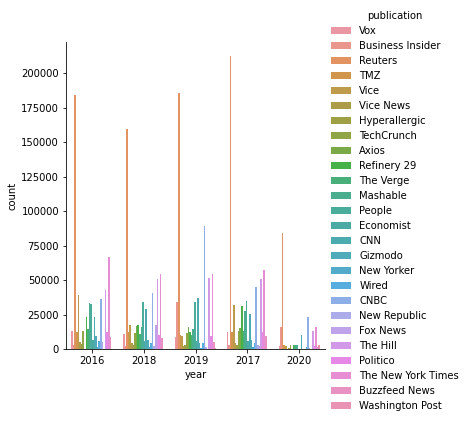

In [ ]:
sns.catplot(data=df, x='year',kind='count',hue='publication')

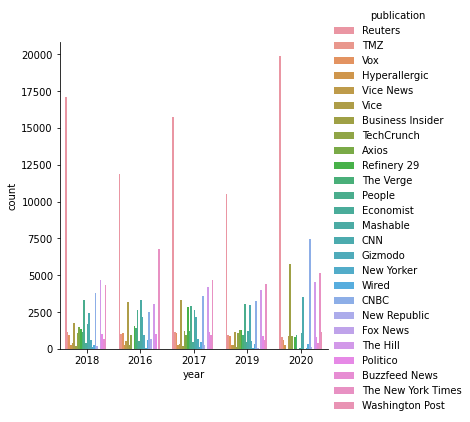

In [ ]:
sns.catplot(data=df[df.month == 1.0], x='year',kind='count',hue='publication')

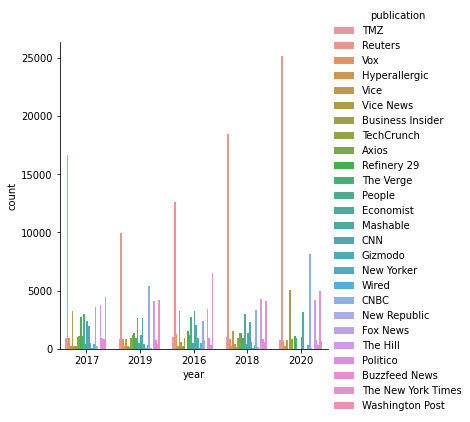

In [ ]:
sns.catplot(data=df[df.month == 2.0], x='year',kind='count',hue='publication')

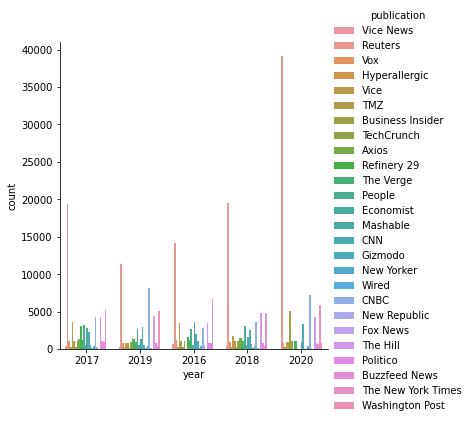

In [ ]:
sns.catplot(data=df[df.month == 3.0], x='year',kind='count',hue='publication')

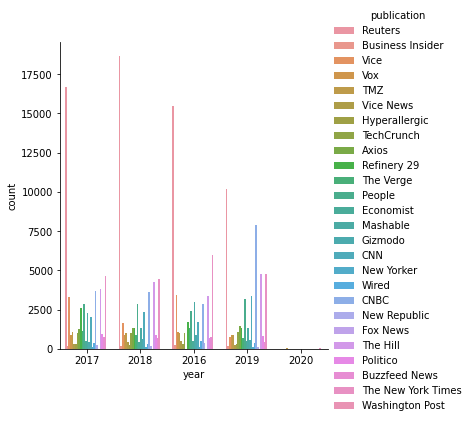

In [ ]:
sns.catplot(data=df[df.month == 4.0], x='year',kind='count',hue='publication')

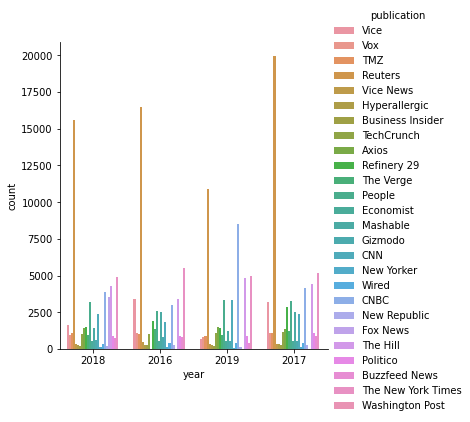

In [ ]:
sns.catplot(data=df[df.month == 5.0], x='year',kind='count',hue='publication')

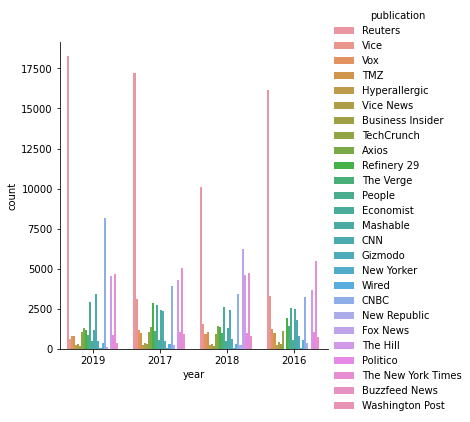

In [ ]:
sns.catplot(data=df[df.month == 6.0], x='year',kind='count',hue='publication')

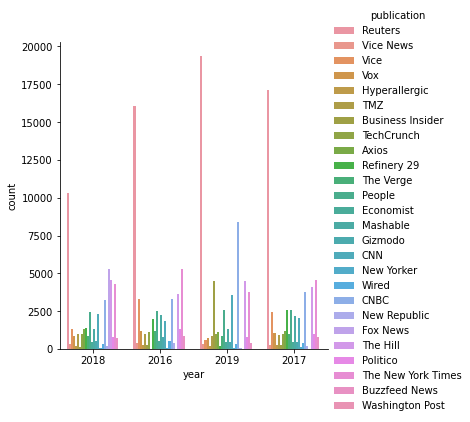

In [ ]:
sns.catplot(data=df[df.month == 7.0], x='year',kind='count',hue='publication')

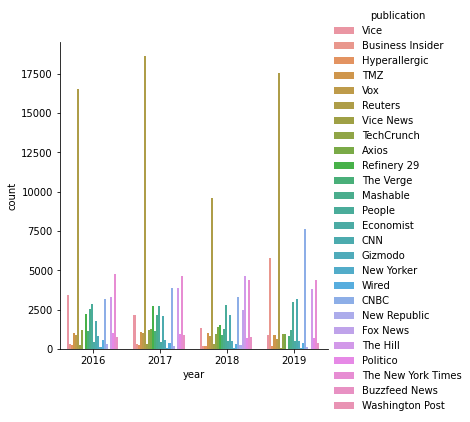

In [ ]:
sns.catplot(data=df[df.month == 8.0], x='year',kind='count',hue='publication')

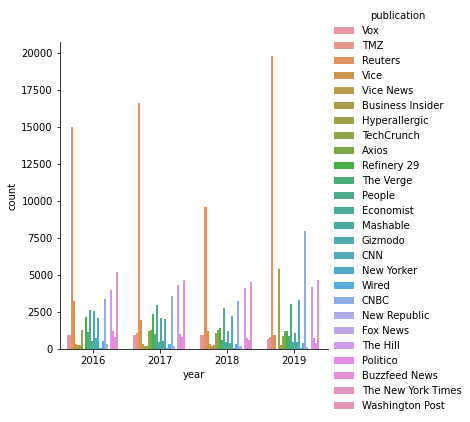

In [ ]:
sns.catplot(data=df[df.month == 9.0], x='year',kind='count',hue='publication')

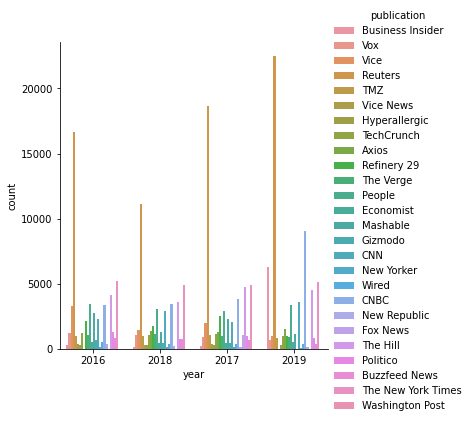

In [ ]:
sns.catplot(data=df[df.month == 10.0], x='year',kind='count',hue='publication')

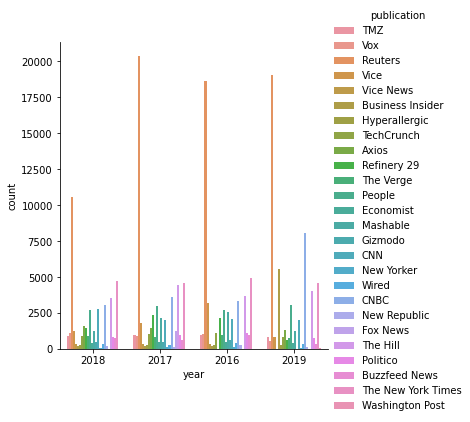

In [ ]:
sns.catplot(data=df[df.month == 11.0], x='year',kind='count',hue='publication')

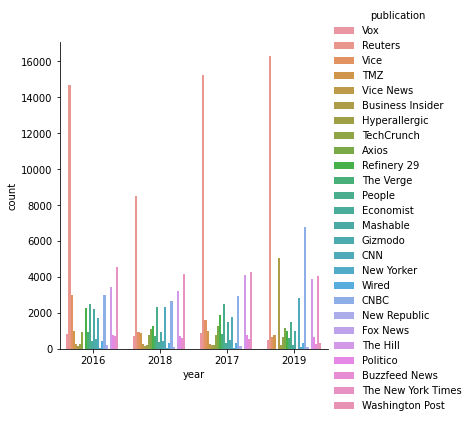

In [ ]:
sns.catplot(data=df[df.month == 12.0], x='year',kind='count',hue='publication')

<Figure size 1080x576 with 0 Axes>

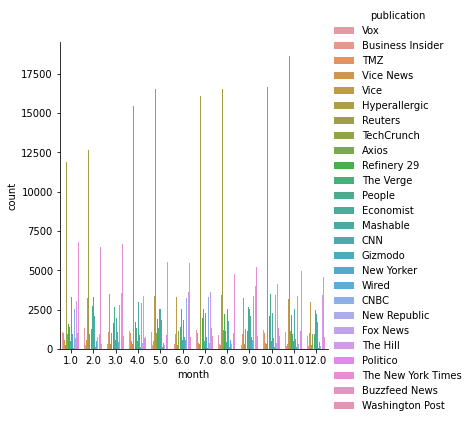

In [ ]:
plt.figure(figsize=(15,8))
sns.catplot(data=df[df.year == '2016'], x='month',kind='count',hue='publication')

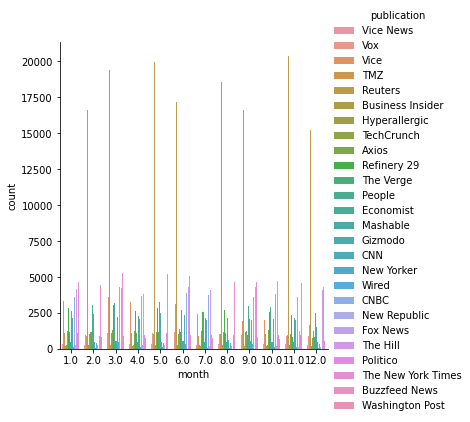

In [ ]:
sns.catplot(data=df[df.year == '2017'], x='month',kind='count',hue='publication')

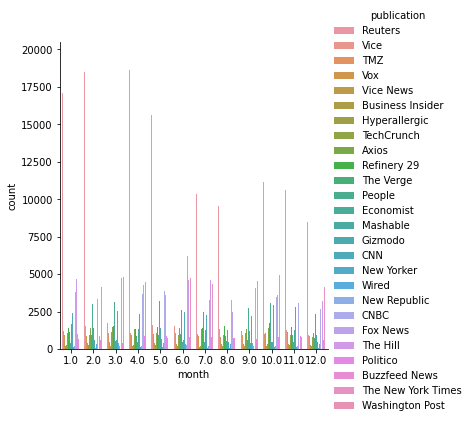

In [ ]:
sns.catplot(data=df[df.year == '2018'], x='month',kind='count',hue='publication')

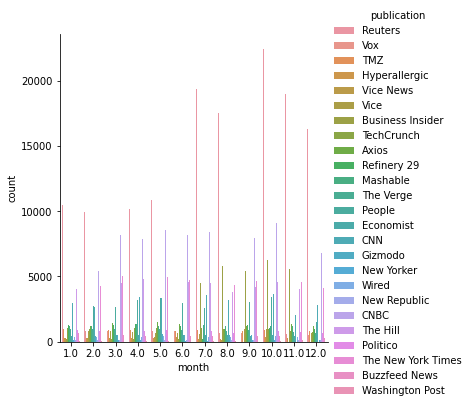

In [ ]:
sns.catplot(data=df[df.year == '2019'], x='month',kind='count',hue='publication')

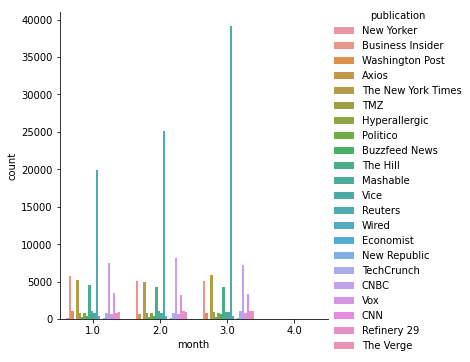

In [ ]:
sns.catplot(data=df[df.year == '2020'], x='month',kind='count',hue='publication')

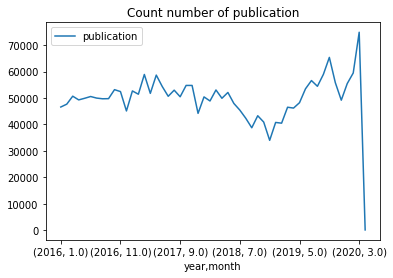

In [ ]:
df.groupby(['year','month']).agg({'publication': 'count'}).plot(title='Count number of publication')

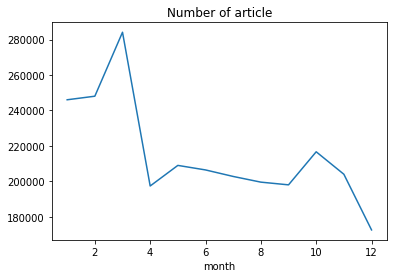

In [ ]:
df.groupby('month').size().plot(title='Number of article')

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

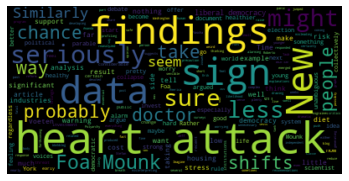

In [ ]:
text = df.article[0]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

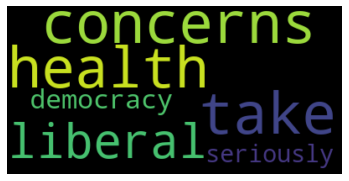

In [ ]:
text = df.title[0]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
df.head(3)

,date,year,month,day,title,article,publication
0,2016-12-09 18:31:00,2016,12.000,9,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",Vox
1,2016-10-07 21:26:46,2016,10.000,7,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
2,2018-01-26 00:00:00,2018,1.000,26,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters


In [10]:
# quick and dirty word cloud
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')
#stopwords = set(nltk.corpus.stopwords.words('english'))
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in STOPWORDS]

'''
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords
'''

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

df['title_tokens'] = df['title'].apply(prepare, pipeline=pipeline)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
df['num_tokens'] = df['title_tokens'].map(len) # used for later

from collections import Counter
counter = Counter()
df['title_tokens'].map(counter.update)
print(counter.most_common(5))

[('thehill', 208411), ('trump', 207771), ('says', 150499), ('new', 130153), ('u', 103339)]


In [14]:
def count_words(df, column='title_tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

freq_df = count_words(df)
freq_df.head(5)

,freq
token,
thehill,208411
trump,207771
says,150499
new,130153
u,103339


[Text(0, 0.5, 'Token'), Text(0.5, 0, 'Frequency'), Text(0.5, 1.0, 'Top Words')]

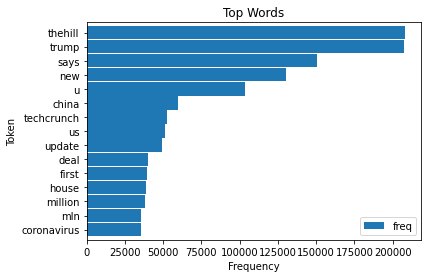

In [15]:
ax = freq_df.head(15).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [17]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400,
                   background_color= "black", colormap="Paired",
                   max_font_size=150, max_words=max_words)

    # convert DataFrame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")


(76548, 1)


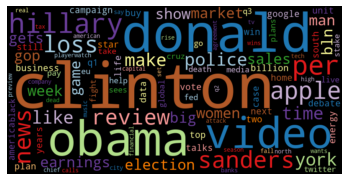

In [27]:
freq_2016_df = count_words(df[df['year']==2016])
print(freq_2016_df.shape)
plt.figure()
wordcloud(freq_2016_df['freq'], max_words=100)
wordcloud(freq_2016_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

In [36]:
df.publication.unique()

array(['Vox', 'Business Insider', 'Reuters', 'TMZ', 'Vice', 'Vice News',
       'Hyperallergic', 'TechCrunch', 'Axios', 'Refinery 29', 'The Verge',
       'Mashable', 'People', 'Economist', 'CNN', 'Gizmodo', 'New Yorker',
       'Wired', 'CNBC', 'New Republic', 'Fox News', 'The Hill',
       'Politico', 'The New York Times', 'Buzzfeed News',
       'Washington Post'], dtype=object)

(7690, 1)


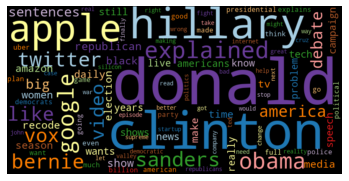

In [43]:
freq_2016_df = count_words( (df[ (df['year']==2016) & (df['publication'] == 'Vox') ]) )
print(freq_2016_df.shape)
plt.figure()
wordcloud(freq_2016_df['freq'], max_words=100)
wordcloud(freq_2016_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

(80500, 1)


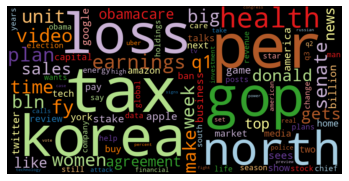

In [28]:
freq_2017_df = count_words(df[df['year']==2017])
print(freq_2017_df.shape)
plt.figure()
wordcloud(freq_2017_df['freq'], max_words=100)
wordcloud(freq_2017_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

(69041, 1)


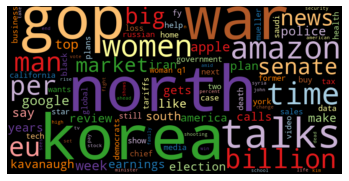

In [29]:
freq_2018_df = count_words(df[df['year']==2018])
print(freq_2018_df.shape)
plt.figure()
wordcloud(freq_2018_df['freq'], max_words=100)
wordcloud(freq_2018_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

(67162, 1)


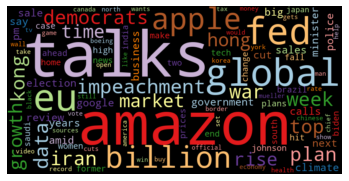

In [30]:
freq_2019_df = count_words(df[df['year']==2019])
print(freq_2019_df.shape)
plt.figure()
wordcloud(freq_2019_df['freq'], max_words=100)
wordcloud(freq_2019_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

(38423, 1)


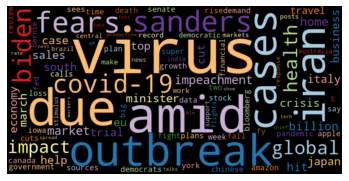

In [31]:
freq_2020_df = count_words(df[df['year']==2020])
print(freq_2020_df.shape)
plt.figure()
wordcloud(freq_2020_df['freq'], max_words=100)
wordcloud(freq_2020_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

In [44]:
df.head(3)

,date,year,month,day,title,article,publication,title_tokens,num_tokens
0,2016-12-09 18:31:00,2016,12.000,9,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",Vox,"[take, concerns, health, liberal, democracy, s...",6
1,2016-10-07 21:26:46,2016,10.000,7,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider,"[colts, gm, ryan, grigson, says, andrew, luck,...",12
2,2018-01-26 00:00:00,2018,1.000,26,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters,"[trump, denies, report, ordered, mueller, fired]",6


In [46]:
# Term frequency is not enough. 

def compute_idf(df, column='title_tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    df[column].map(update)

    # create DataFrame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df

idf_df = compute_idf(df)
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [48]:
freq_2019 = count_words(df[df['year'] == 2019])
freq_2020 = count_words(df[df['year'] == 2020])

freq_2019['tfidf'] = freq_2019['freq'] * idf_df['idf']
freq_2020['tfidf'] = freq_2020['freq'] * idf_df['idf']

In [49]:
freq_2019.head(3)

,freq,tfidf
token,,
thehill,51674,135263.900
trump,45242,119084.539
says,39291,115705.616


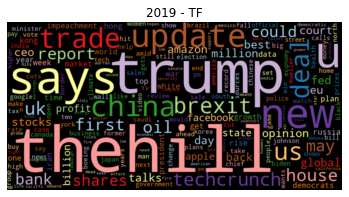

In [50]:
wordcloud(freq_2019['freq'], title='2019 - TF',
          stopwords=['twenty-fifth', 'twenty-five'])

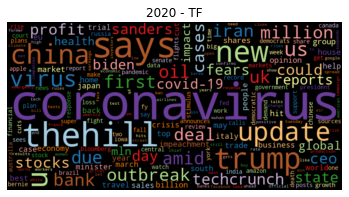

In [52]:
wordcloud(freq_2020['freq'], title='2020 - TF',
          stopwords=['seventieth'])

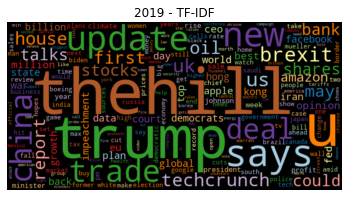

In [53]:
wordcloud(freq_2019['tfidf'], title='2019 - TF-IDF',
          stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])

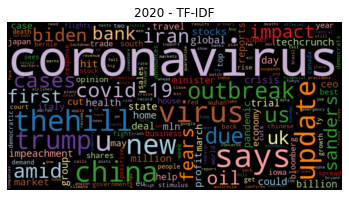

In [51]:
wordcloud(freq_2020['tfidf'], title='2020 - TF-IDF',
          stopwords=['seventieth'])

### N-gram analysis: In text processing, we usually work with bigrams (sequences of length 2), sometimes even trigrams (length 3). n-grams of size 1 are single words, also called unigrams. The reason to stick to n ≤ 3 is that the number of different n-grams increases exponentially with respect to n, while their frequencies decrease in the same way. By far the most trigrams appear only once in a corpus.

In [56]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

In [57]:
stopwords

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>

In [59]:
#df['bigrams'] = df['title_tokens'].apply(ngrams, n=2, stopwords=stopwords)
df['bigrams'] = df['title_tokens'].apply(ngrams, n=2)
count_words(df, 'bigrams').head(5)

,freq
token,
donald trump,19434
new york,16931
per share,16895
white house,16443
north korea,11353


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


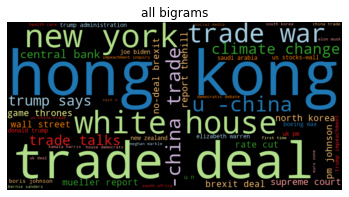

In [60]:
# concatenate existing IDF DataFrame with bigram IDFs
idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)])

freq_df = count_words(df[df['year'] == 2019], 'bigrams')
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
wordcloud(freq_df['tfidf'], title='all bigrams', max_words=50)

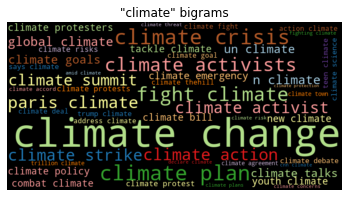

In [61]:
where = freq_df.index.str.contains('climate')
wordcloud(freq_df[where]['freq'], title='"climate" bigrams', max_words=50)

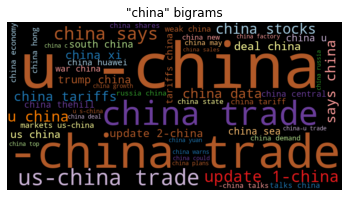

In [62]:
where = freq_df.index.str.contains('china')
wordcloud(freq_df[where]['freq'], title='"china" bigrams', max_words=50)

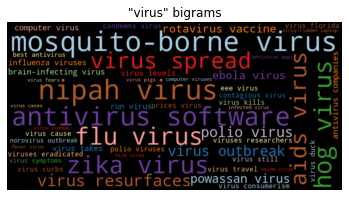

In [63]:
where = freq_df.index.str.contains('virus')
wordcloud(freq_df[where]['freq'], title='"virus" bigrams', max_words=50)

### Creating frequency timelines

In [65]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]
    
def count_keywords_by(df, by, keywords, column='title_tokens'):

    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)

    return freq_df.groupby(by=by).sum().sort_values(by)

keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [67]:
freq_df.head(3)

,nuclear,terrorism,climate,freedom
year,,,,
2016,1285,543,1696,435
2017,1923,496,2834,634
2018,1903,238,1782,385


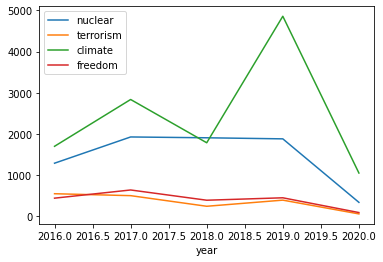

In [66]:
freq_df.plot(kind='line')

### Creating frequency heatmaps

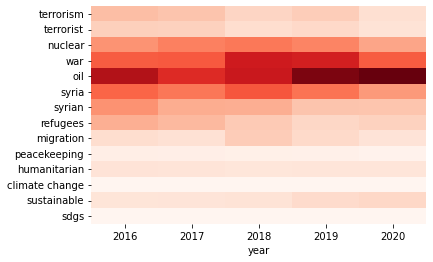

In [69]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping',
            'humanitarian', 'climate change', 'sustainable', 'sdgs']

freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
